In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif,SelectKBest, chi2,RFE,SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,precision_recall_fscore_support
from sklearn.model_selection import cross_val_score, cross_val_predict 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#import data and explore data
df = pd.read_csv("Dataset_Study3.csv")
print(df.head())
print("info " , df.info())
print("Desc" ,df.describe())
print("Is null ",df.isnull().value_counts())
print("is duplicate: ",df.duplicated().value_counts())

y = df['Label']
df.drop('Label',axis =1,inplace =True)

   HRV_MeanNN   HRV_SDNN  HRV_RMSSD  HRV_Prc20NN  HRV_Prc80NN  HRV_pNN50  \
0  838.708920  77.858966  42.966689        773.2        907.4  21.962617   
1  899.929293  80.454862  50.910712        838.6        960.4  24.623116   
2  827.319444  64.428505  40.450375        766.4        881.8  20.276498   
3  768.630901  76.803474  43.512943        699.0        837.4  23.076923   
4  807.432432  82.942629  49.326201        731.0        879.2  18.834081   

     HRV_HTI     HRV_VLF       HRV_LF      HRV_HF       HRV_TP  HRV_LFHF  \
0  15.285714  135.219052  1984.443232  941.576892  3083.350848  2.107574   
1  15.307692   77.009053  1012.790954  712.205460  1835.167749  1.422049   
2  15.500000  129.751167  1924.529470  761.893623  2848.723565  2.525982   
3  16.714286  163.822696  4643.049228  806.486463  5625.889299  5.757132   
4  13.937500  132.967712  2348.301339  567.338064  3066.742236  4.139157   

     HRV_SD1     HRV_SD2  HRV_SD1SD2  HRV_DFA_alpha1  HRV_DFA_alpha2  \
0  30.452465  

Visualise data

array([[<Axes: title={'center': 'HRV_MeanNN'}>,
        <Axes: title={'center': 'HRV_SDNN'}>,
        <Axes: title={'center': 'HRV_RMSSD'}>,
        <Axes: title={'center': 'HRV_Prc20NN'}>],
       [<Axes: title={'center': 'HRV_Prc80NN'}>,
        <Axes: title={'center': 'HRV_pNN50'}>,
        <Axes: title={'center': 'HRV_HTI'}>,
        <Axes: title={'center': 'HRV_VLF'}>],
       [<Axes: title={'center': 'HRV_LF'}>,
        <Axes: title={'center': 'HRV_HF'}>,
        <Axes: title={'center': 'HRV_TP'}>,
        <Axes: title={'center': 'HRV_LFHF'}>],
       [<Axes: title={'center': 'HRV_SD1'}>,
        <Axes: title={'center': 'HRV_SD2'}>,
        <Axes: title={'center': 'HRV_SD1SD2'}>,
        <Axes: title={'center': 'HRV_DFA_alpha1'}>],
       [<Axes: title={'center': 'HRV_DFA_alpha2'}>,
        <Axes: title={'center': 'HRV_ApEn'}>,
        <Axes: title={'center': 'HRV_SampEn'}>, <Axes: >]], dtype=object)

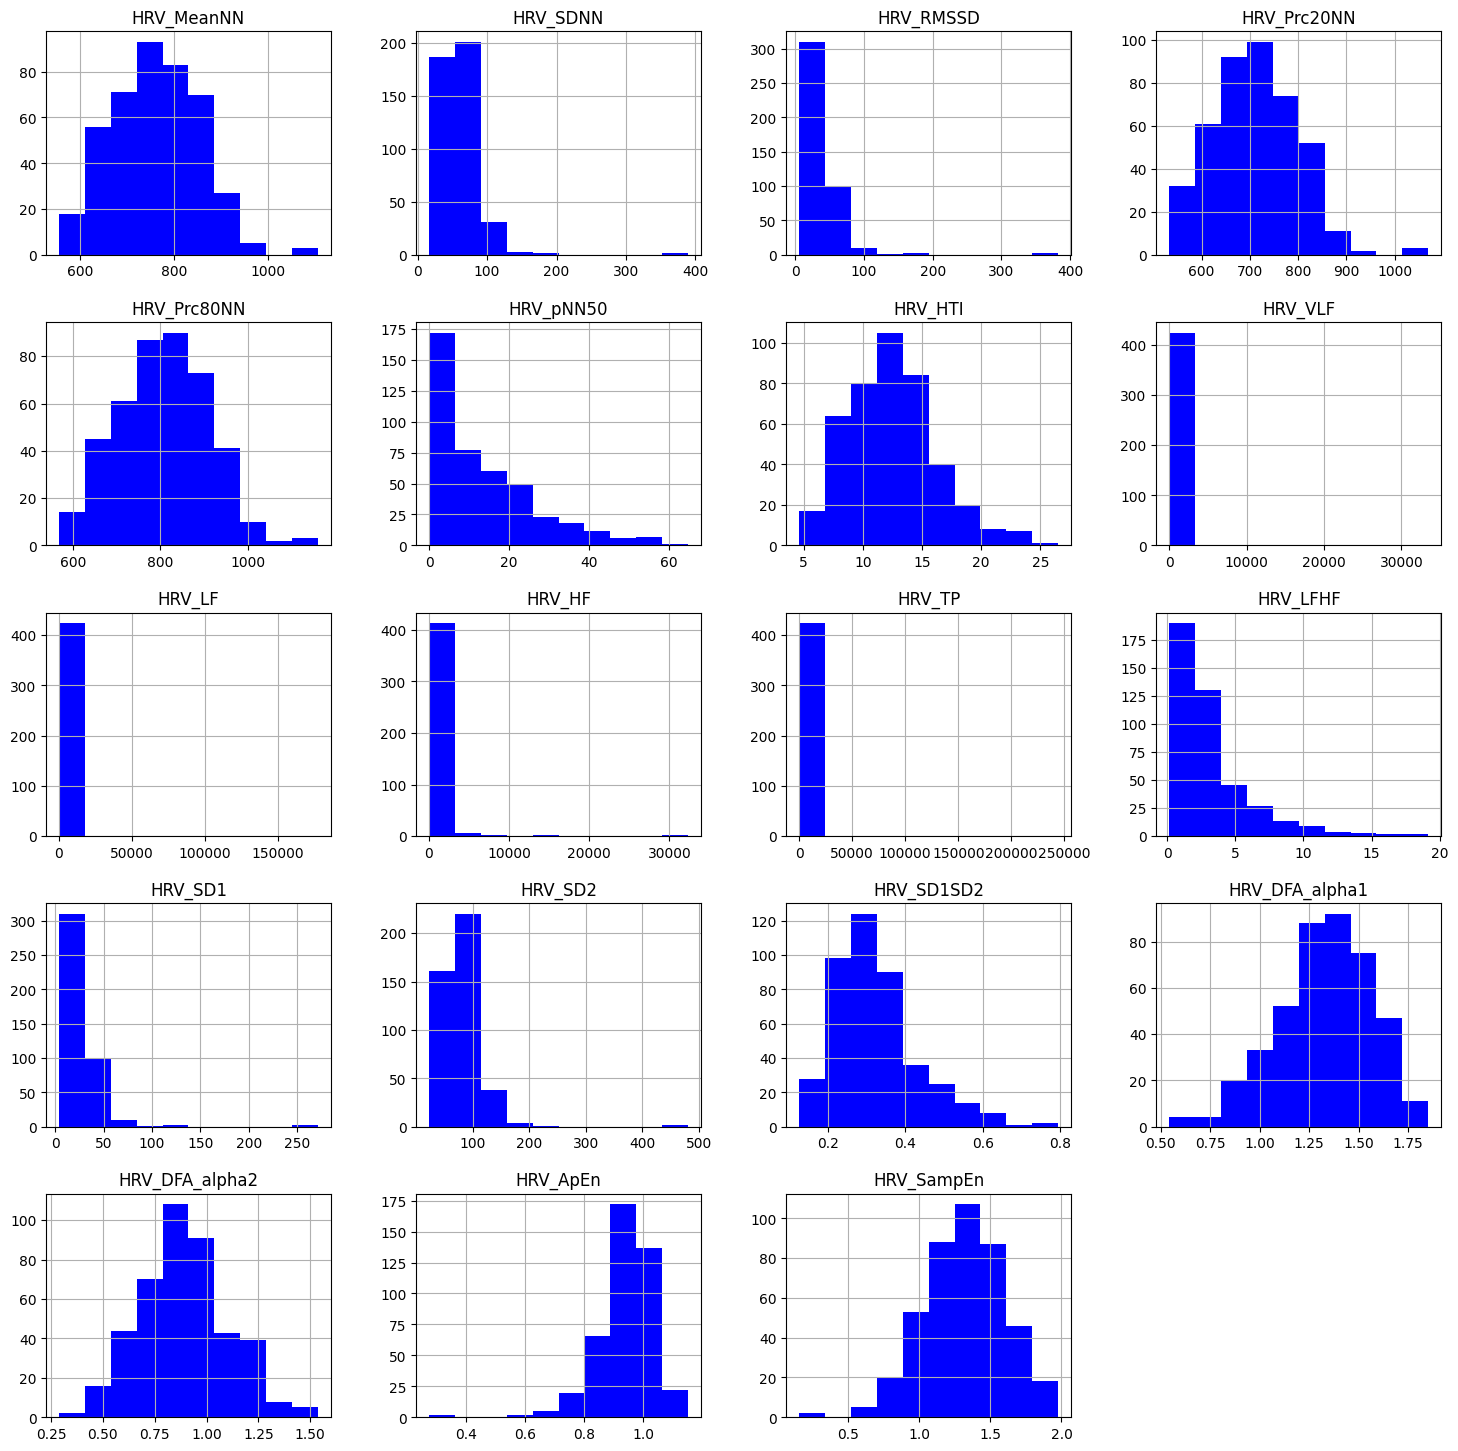

In [3]:
#histogram
df.hist(figsize=(18,18), color = 'blue')

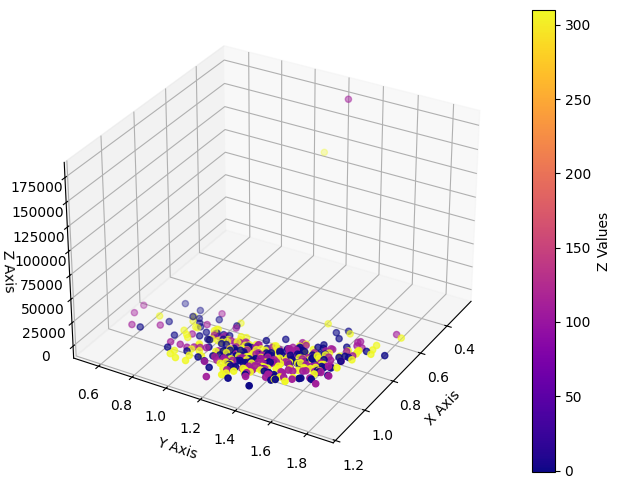

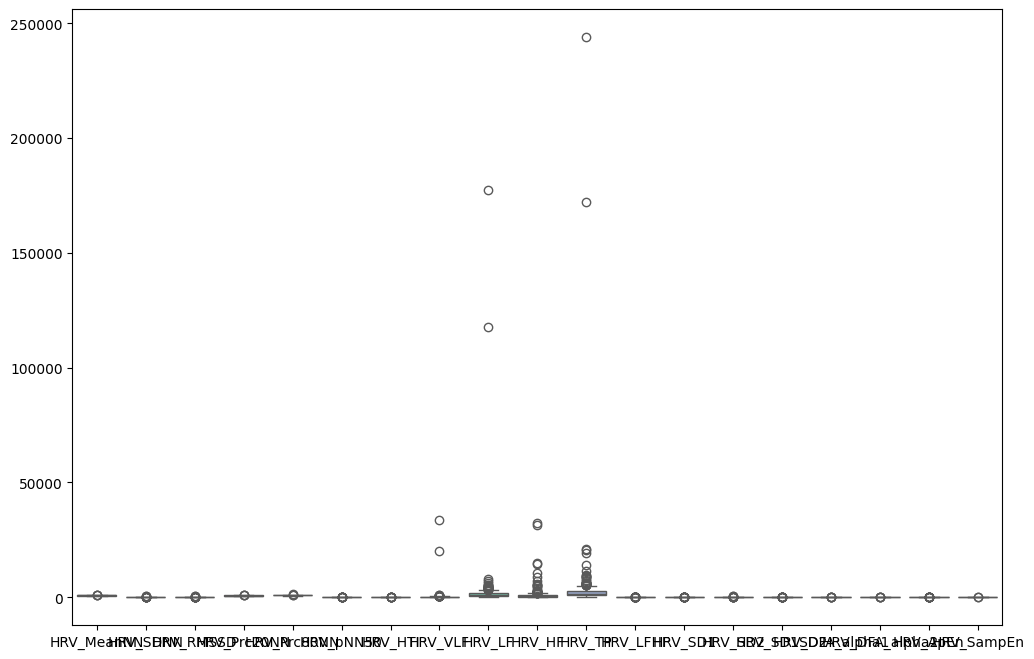

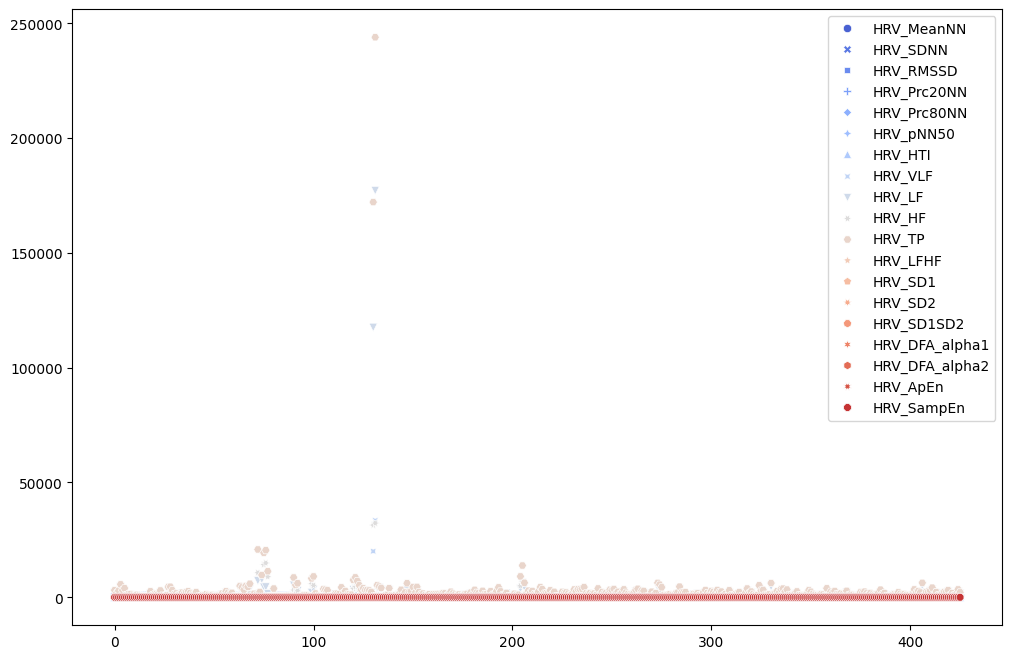

In [4]:
# Define colors
scatter_color = 'plasma'
boxplot_palette = 'Set2'
scatterplot_palette = 'coolwarm'

# Create a scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['HRV_ApEn'],df['HRV_DFA_alpha1'],df['HRV_LF'], c=y, cmap=scatter_color)

# Customize plot appearance
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
cbar = fig.colorbar(scatter)
cbar.set_label('Z Values')

# Change the perspective (adjust the viewing angle)
ax.view_init(elev=30, azim=30)

plt.show()

# Boxplot 
plt.figure(figsize=(12,8))
sns.boxplot(data=df, palette=boxplot_palette)
plt.show()

# Scatterplot
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, palette=scatterplot_palette)
plt.show()

In [5]:
#Standard scaling data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
X_scaled = pd.DataFrame(data_scaled,columns=df.columns)
print(X_scaled.head)
#X_scaled.columns

<bound method NDFrame.head of      HRV_MeanNN  HRV_SDNN  HRV_RMSSD  HRV_Prc20NN  HRV_Prc80NN  HRV_pNN50  \
0      0.829700  0.541536   0.150884     0.702806     0.957057   0.632274   
1      1.481422  0.624833   0.406379     1.453095     1.465672   0.833574   
2      0.708453  0.110581   0.069954     0.624794     0.711386   0.504697   
3      0.083683  0.507667   0.168452    -0.148440     0.285300   0.716585   
4      0.496745  0.704660   0.355418     0.218674     0.686435   0.395560   
..          ...       ...        ...          ...          ...        ...   
421   -1.954061 -0.350672  -0.515635    -2.006954    -1.887351  -0.810519   
422   -1.917053 -0.710068  -0.671656    -1.880759    -1.904625  -0.956257   
423   -0.863523 -0.226088  -0.351677    -0.825306    -0.933457  -0.484936   
424   -1.386623  0.485735  -0.205851    -1.605423    -1.221353  -0.470001   
425   -1.109970 -0.324265  -0.368005    -1.038691    -1.273174  -0.669180   

      HRV_HTI   HRV_VLF    HRV_LF    HRV_HF  

Feature Selection

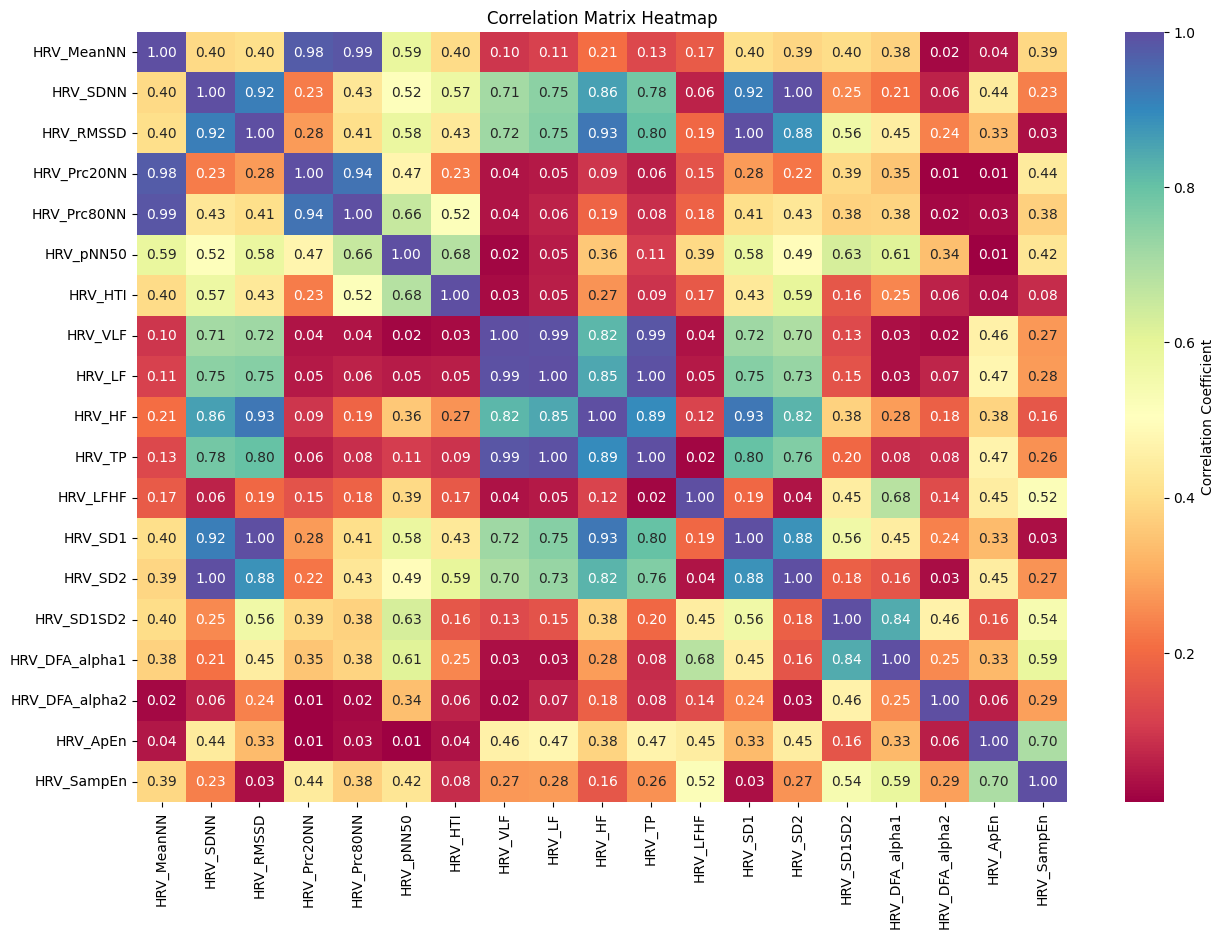

Index(['HRV_MeanNN', 'HRV_SDNN', 'HRV_pNN50', 'HRV_HTI', 'HRV_VLF', 'HRV_LFHF',
       'HRV_SD1SD2', 'HRV_DFA_alpha2', 'HRV_ApEn', 'HRV_SampEn'],
      dtype='object')


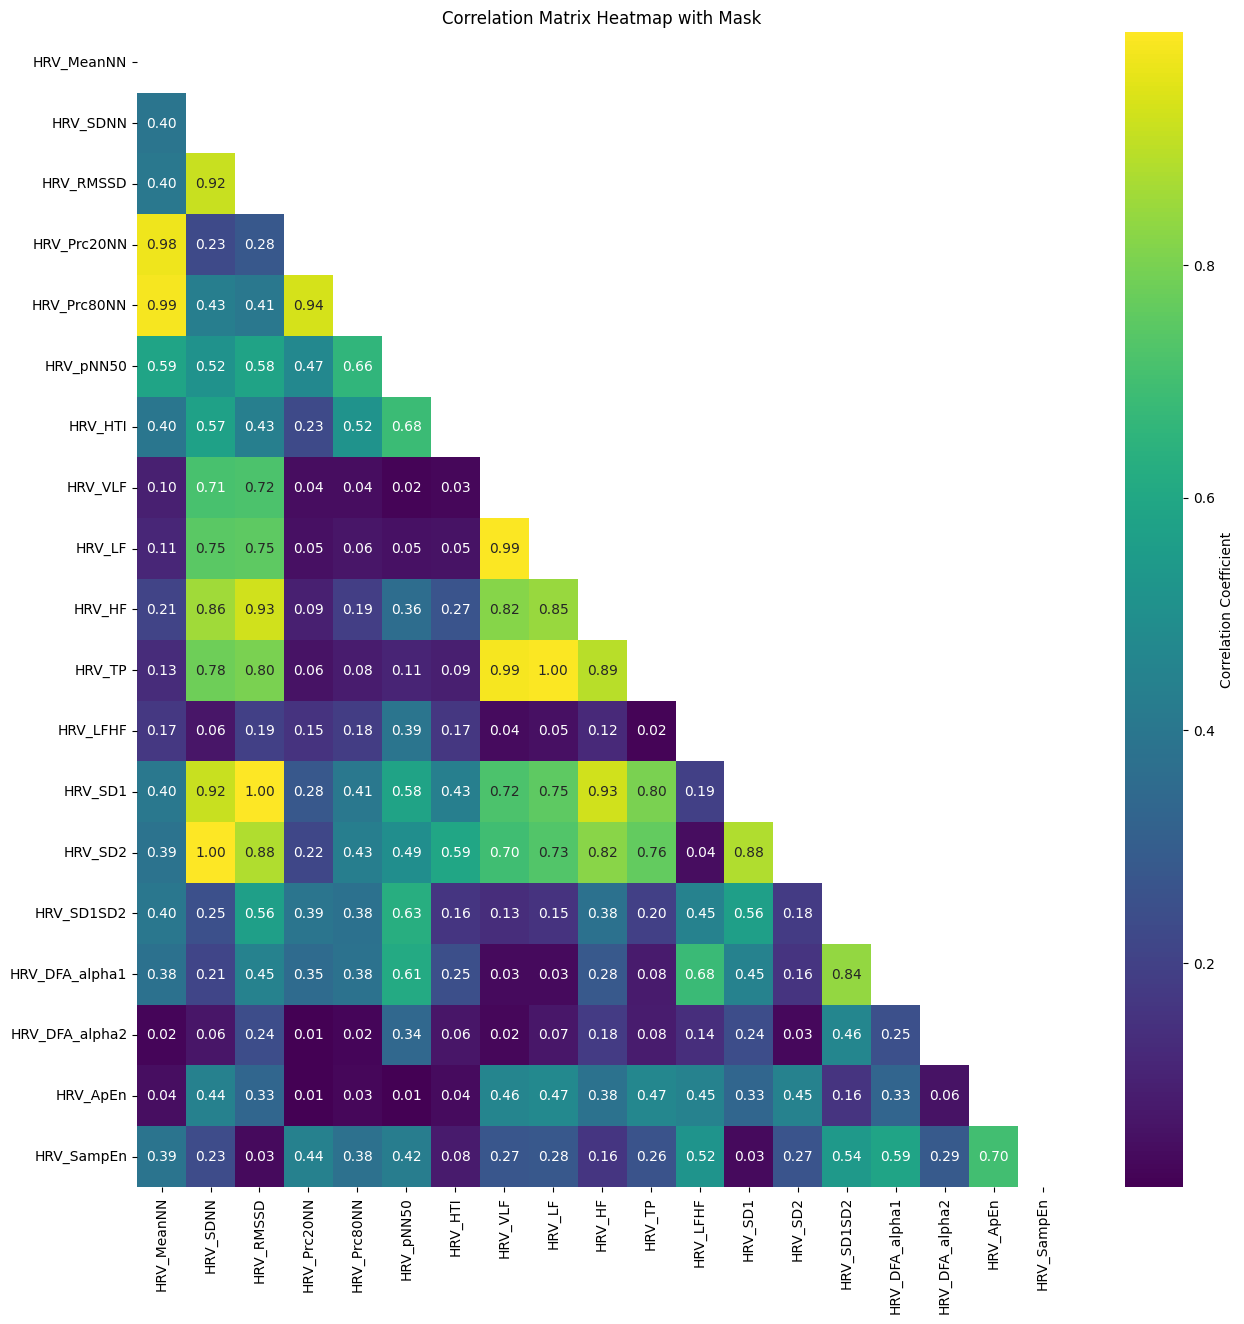

In [6]:
#filter method
#correlation matrix shows the  degree of relationship between variables in a dataset.

# Compute the correlation matrix
correlation_matrix = X_scaled.corr().abs()

# Plot the correlation matrix heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Spectral", fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix Heatmap')
plt.show()

# Create a mask to exclude the upper triangle of the correlation matrix (to avoid duplicates)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Identify features with correlation above a certain threshold
threshold = 0.8
correlated_features = [column for column in range(len(correlation_matrix.columns)) if any(correlation_matrix.iloc[:column, column] > threshold)]

# Drop the highly correlated features
# Dropping correlated (similar) features allows to simplify the data for the model of classification
selected_features = X_scaled.drop(columns=X_scaled.columns[correlated_features])
print(selected_features.columns)

# Plot the masked heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", mask=mask, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix Heatmap with Mask')
plt.show()


In [7]:
#filter method
#mutual info gain
#Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. 
#It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency
#use k-nearest neighbors distance
# Calculate information gain for each feature       
info_gain = mutual_info_classif(X_scaled, y)
feature_info_gain = pd.DataFrame({'Feature': X_scaled.columns, 'Info Gain': info_gain})
top = feature_info_gain.sort_values(by='Info Gain', ascending=False,inplace=False)
top = top.head(10)
print("Feature Information Gain:")
print(list(top['Feature']))

Feature Information Gain:
['HRV_SD1SD2', 'HRV_DFA_alpha1', 'HRV_MeanNN', 'HRV_ApEn', 'HRV_HTI', 'HRV_HF', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50', 'HRV_Prc80NN']


In [8]:
#recursive feature elimination based on logistic regression
#wrapper model
#Logistic regression allows to select the least important features and  RFE removes them

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10) # Selecting top 10 features
fit = rfe.fit(X_scaled, y)
# Print the selected features
selected_features2 = [f for f, s in zip(df.columns, fit.support_) if s]
print("Selected Features: ", selected_features2)


Selected Features:  ['HRV_RMSSD', 'HRV_VLF', 'HRV_LF', 'HRV_HF', 'HRV_TP', 'HRV_SD1', 'HRV_SD1SD2', 'HRV_DFA_alpha1', 'HRV_ApEn', 'HRV_SampEn']


In [9]:
#embedded 
# DecisionTreeClassifier for feature importance
dtree_model = DecisionTreeClassifier(random_state=0)
dtree_model.fit(X_scaled, y)
# Extracting feature importances
dtree_importances = dtree_model.feature_importances_
dtree_indices = np.argsort(dtree_importances)[::-1]
top_features_dtree = X_scaled.columns[dtree_indices[:10]]
print(top_features_dtree)

Index(['HRV_DFA_alpha2', 'HRV_LF', 'HRV_HTI', 'HRV_LFHF', 'HRV_Prc20NN',
       'HRV_DFA_alpha1', 'HRV_VLF', 'HRV_SampEn', 'HRV_SD1SD2', 'HRV_HF'],
      dtype='object')


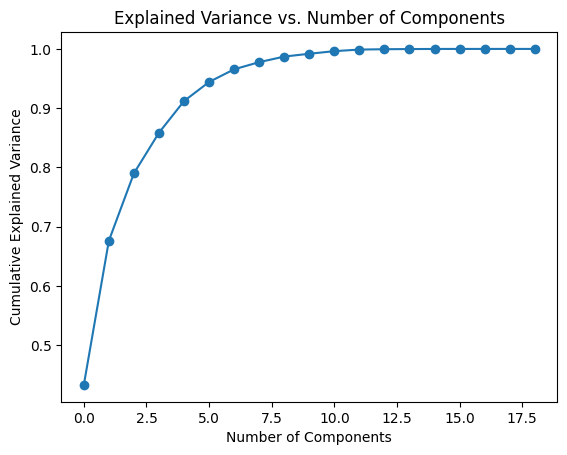

Explained Variance Ratio:
['HRV_MeanNN', 'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_RMSSD', 'HRV_SDNN']


In [10]:
#PCA
pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

pca = PCA(n_components=5)  # Set the number of components you want
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.transform(X_test)
print("Explained Variance Ratio:")
print(sorted(pca.feature_names_in_[:5]))

Classification

In [11]:
# create a new df with selected features
sel = ['HRV_VLF','HRV_SD1SD2','HRV_HF','HRV_LF','HRV_HTI','HRV_LFHF','HRV_DFA_alpha2']
#sel = ['HRV_SDNN','HRV_pNN50','HRV_TP','HRV_SD1','HRV_RMSSD','HRV_Prc80NN','HRV_SD2'] #decreased
#sel = ['HRV_DFA_alpha2','HRV_MeanNN','HRV_ApEn','HRV_SampEn','HRV_DFA_alpha1','HRV_Prc20NN','HRV_SDNN']#decreased
#sel = ['HRV_HF', 'HRV_HTI', 'HRV_LF', 'HRV_MeanNN', 'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_RMSSD']#pca 

df_new = pd.concat([X_scaled[sel],y],axis=1)
df_new.head()
y = df_new['Label']
df_new.drop('Label',axis =1,inplace =True)
X_train,X_test,y_train,y_test = train_test_split(df_new,y,test_size=0.2,random_state=42)


0.3023255813953488


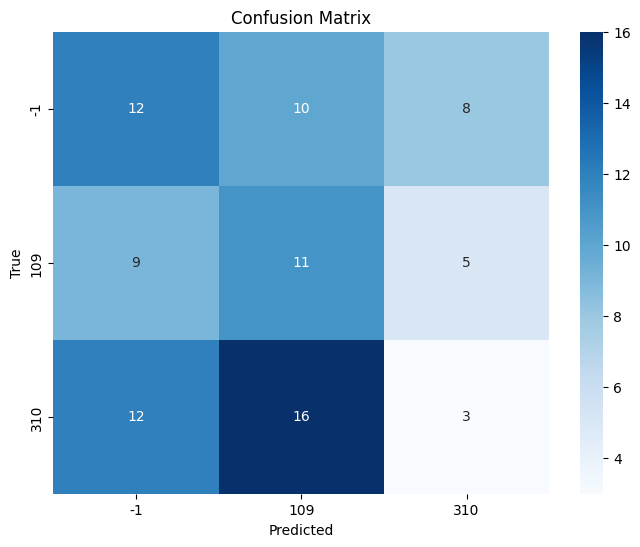

In [12]:
#logistic
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
print(logistic.score(X_test,y_test))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

0.26744186046511625


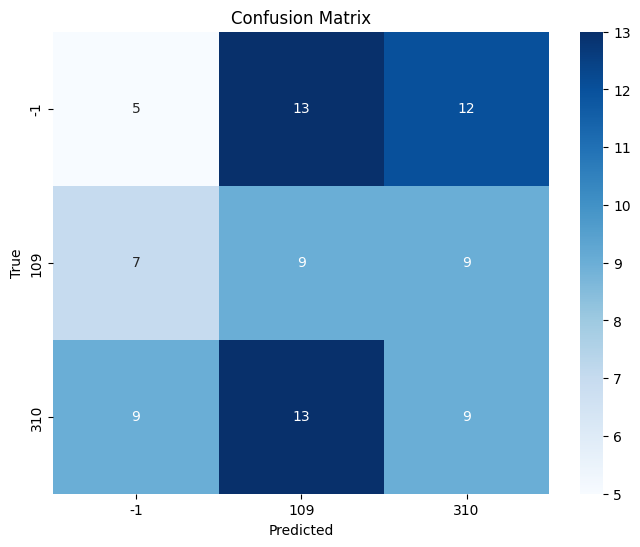

In [13]:

#dtree
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print(dtree.score(X_test,y_test))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

[Text(0.7657294613011056, 0.9722222222222222, 'x[1] <= 0.852\ngini = 0.666\nsamples = 340\nvalue = [112, 117, 111]'),
 Text(0.6322560426844948, 0.9166666666666666, 'x[0] <= 0.113\ngini = 0.665\nsamples = 284\nvalue = [100, 100, 84]'),
 Text(0.6989927519928002, 0.9444444444444444, 'True  '),
 Text(0.49310555412702495, 0.8611111111111112, 'x[3] <= -0.077\ngini = 0.665\nsamples = 275\nvalue = [99, 93, 83]'),
 Text(0.27150295705836974, 0.8055555555555556, 'x[6] <= 0.435\ngini = 0.665\nsamples = 173\nvalue = [60, 52, 61]'),
 Text(0.18224479300591412, 0.75, 'x[4] <= -1.916\ngini = 0.659\nsamples = 110\nvalue = [30.0, 36.0, 44.0]'),
 Text(0.1740164566726665, 0.6944444444444444, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.19047312933916175, 0.6944444444444444, 'x[2] <= -0.026\ngini = 0.654\nsamples = 107\nvalue = [27.0, 36.0, 44.0]'),
 Text(0.12972486500385702, 0.6388888888888888, 'x[2] <= -0.293\ngini = 0.65\nsamples = 96\nvalue = [25, 29, 42]'),
 Text(0.041141681666238106, 0.58333

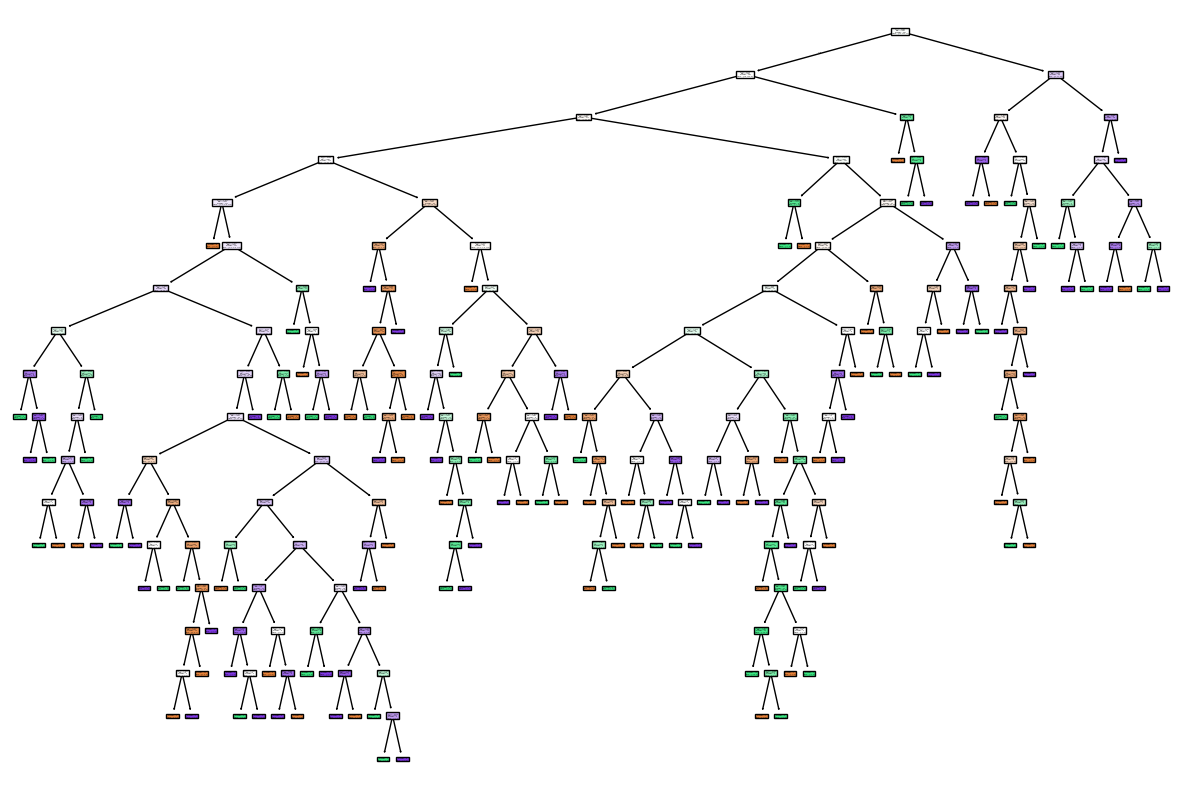

In [14]:
from sklearn import tree 
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True,label='all')

In [15]:
from sklearn.metrics import classification_report

# Function to perform cross-validation and return average metrics
def perform_cross_validation_with_metrics(model, X, y, cv=5):
    cv_predictions = cross_val_predict(model, X, y, cv=cv)
    
    # Calculate metrics
    accuracy = accuracy_score(y, cv_predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(y, cv_predictions, average='weighted')
    
    return accuracy, precision, recall, f1

lr_accuracy, lr_precision, lr_recall, lr_f1 = perform_cross_validation_with_metrics(logistic, X_test, y_test)
dt_accuracy, dt_precision, dt_recall, dt_f1 = perform_cross_validation_with_metrics(dtree, X_test, y_test)


# Create a DataFrame to display the results
results_df = pd.DataFrame({
    "Model": ['Logistic Regression', 'Decision Tree'],
    "Accuracy": [lr_accuracy, dt_accuracy],
    "Precision": [lr_precision, dt_precision],
    "Recall": [lr_recall, dt_recall],
    "F1 Score": [lr_f1, dt_f1]
})

# Print the results
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.430233   0.430140  0.430233  0.420170
1        Decision Tree  0.348837   0.334847  0.348837  0.340322
